# DS 9000 Project

Dataset [here](https://www.kaggle.com/datasets/nasa/kepler-exoplanet-search-results)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cumulative.csv")
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


## Summary of Columns
There are 50 columns in the dataset:

### Object Identification Columns
- `kepid`: The target ID, from the Kepler Input Catalog
- `kepoi_name`: Number used to identify a KOI (Kepler Object of Interest-- object that has exhibited at least one transit-like sequence)
- `kepler_name`: Name given once an object has been confirmed as a planet

### Target Variable
- `koi_disposition`: The category of the KOI according to the literature. (CANDIDATE, FALSE POSITIVE, NOT DISPOSITIONED, CONFIRMED)

### Project Disposition Columns
These columns are the result of Kepler data analysis.
- `koi_pdisposition`: The disposition Kepler data analysis has towards the candidate. (FALSE_POSITIVE, NOT_DISPOSITIONED, CANDIDATE)
- `koi_score`: The confidence in the `koi_pdisposition`. For CANDIDATE, a higher value indicates more confidence in the classification, whereas for FALSE POSITIVE, a higher value indicates less confidence in the disposition. ([0,1])
- `koi_fpflag_nt`: Not transit-like flag. Set when light curve is not consistent with planetary transit. (0 or 1)  
- `koi_fpflag_ss`: Stellar eclipse flag. Set when a significant secondary event is observed which indicates the transit-like event is most likely caused by an eclipsing binary. (0 or 1)
- `koi_fpflag_co`: Centroid offset flag. Set when the source of the signal is from a nearby star (0 or 1).
- `koi_fpflag_ec`: Ephemeris match indicates contamination flag. Set when the KOI has the same period and epoch as another object and is judged to be the result of contamination. (0 or 1)

### Transit Properties
These are physical properties of the stellar transit observed by Kepler
- `koi_period`: Interval between consecutive planetary transits (in days)       
- `koi_period_err1`: Positive uncertainty on `koi_period`
- `koi_period_err2`: Negative uncertainty on `koi_period`
- `koi_time0bk`: Time corresponding to the centre of the first detected transit, minus a constant, in Barycentric Julian Day 
- `koi_time0bk_err1`: Positive uncertainty on `koi_time0bk`
- `koi_time0bk_err2`: Negative uncertainty on `koi_time0bk`
- `koi_impact`: The sky-projected distance between the centre of the stellar disk and the centre of the planet disk at conjunction, normalized by the stellar radius       
- `koi_impact_err1`: Positive uncertainty on `koi_impact`
- `koi_impact_err2`: Negative uncertainty on `koi_impact`
- `koi_duration`: Transit duration in hours.   
- `koi_duration_err1`: Positive uncertainty in transit duration.
- `koi_duration_err2`: Negative uncertainty in transit duration.
- `koi_depth`: The fraction of stellar flux lost at the minimum of planetary transit (ppm)
- `koi_depth_err1`: Positive uncertainty on `koi_depth`
- `koi_depth_err2`: Negative uncertainty on `koi_depth`
- `koi_prad`: Planetary radius (Earth radii)  
- `koi_prad_err1`: Positive uncertainty on `koi_prad`    
- `koi_prad_err2`: Negative uncertainty on `koi_prad`
- `koi_teq`: Approximation for temperature of the planet (Kelvin)
- `koi_teq_err1`: Positive uncertainty on `koi_teq`
- `koi_teq_err2`: Negative uncertainty on `koi_teq`
- `koi_insol`: Insolation flux (Earth flux)
- `koi_insol_err1`: Positive uncertainty on `koi_insol`
- `koi_insol_err2`: Negative uncertainty on `koi_insol`

### Threshold Crossing Event (TCE) Information
- `koi_model_snr`: Transit signal-to-noise ratio    
- `koi_tce_plnt_num`: TCE planet number federated to the KOI*
- `koi_tce_delivname`: TCE delivery name corresponding to the TCE data federated to the KOI*

### Stellar Parameters
- `koi_steff`: The photospheric temperature of the star (Kelvin)        
- `koi_steff_err1`: Positive uncertainty on `koi_steff`
- `koi_steff_err2`: Negative uncertainty on `koi_steff`
- `koi_slogg`: Base 10 logarithm of the star's surface gravity ($log_{10}(cm/s^2)$) 
- `koi_slogg_err1`: Positive uncertainty on `koi_slogg`
- `koi_slogg_err2`: Negative uncertainty on `koi_slogg`
- `koi_srad`: Stellar radius (solar radii)
- `koi_srad_err1`: Positive uncertainty on `koi_srad`
- `koi_srad_err2`: Negative uncertainty on `koi_srad`

### KIC Parameters
- `ra`: KIC Right Ascension (degrees)
- `dec`: KIC Declination (degrees)
- `koi_kepmag`: Kepler-band (magnitude)

We are interested only in parameters related to the physical properties of the transit. As such, we can drop the object identification columns, `koi_tce_plnt_num`, `koi_tce_delivname`, `ra`, and `dec`. We'll also drop `koi_pdisposition`, `koi_score`, and `koi_fpflag_nt`, as these are the product of Kepler's data analysis and not directly related to the physical properties of the transit. We'll keep the `koi_fpflag_ss`, `koi_fpflag_co`, `koi_fpflag_ec` as they describe properties of the light curve and their inclusion may improve model performance.

In [3]:
drop_cols = [
    "rowid",
    "kepid",
    "kepoi_name",
    "kepler_name",
    "koi_pdisposition",
    "koi_score",
    "koi_fpflag_nt",
    "koi_tce_plnt_num",
    "koi_tce_delivname",
    "ra",
    "dec",
]

df = df.drop(drop_cols, axis=1, errors="ignore")

# Basic info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    9564 non-null   object 
 1   koi_fpflag_ss      9564 non-null   int64  
 2   koi_fpflag_co      9564 non-null   int64  
 3   koi_fpflag_ec      9564 non-null   int64  
 4   koi_period         9564 non-null   float64
 5   koi_period_err1    9110 non-null   float64
 6   koi_period_err2    9110 non-null   float64
 7   koi_time0bk        9564 non-null   float64
 8   koi_time0bk_err1   9110 non-null   float64
 9   koi_time0bk_err2   9110 non-null   float64
 10  koi_impact         9201 non-null   float64
 11  koi_impact_err1    9110 non-null   float64
 12  koi_impact_err2    9110 non-null   float64
 13  koi_duration       9564 non-null   float64
 14  koi_duration_err1  9110 non-null   float64
 15  koi_duration_err2  9110 non-null   float64
 16  koi_depth          9201 

From the output above, we can see that `koi_teq_err1` and `koi_teq_err2` are both empty columns. We'll drop those.

In [4]:
df = df.drop(["koi_teq_err1", "koi_teq_err2"], axis=1, errors="ignore")
df.head()

,koi_disposition,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag
0,CONFIRMED,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,15.347
1,CONFIRMED,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,15.347
2,FALSE POSITIVE,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,...,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,15.436
3,FALSE POSITIVE,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,15.597
4,CONFIRMED,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,...,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,15.509


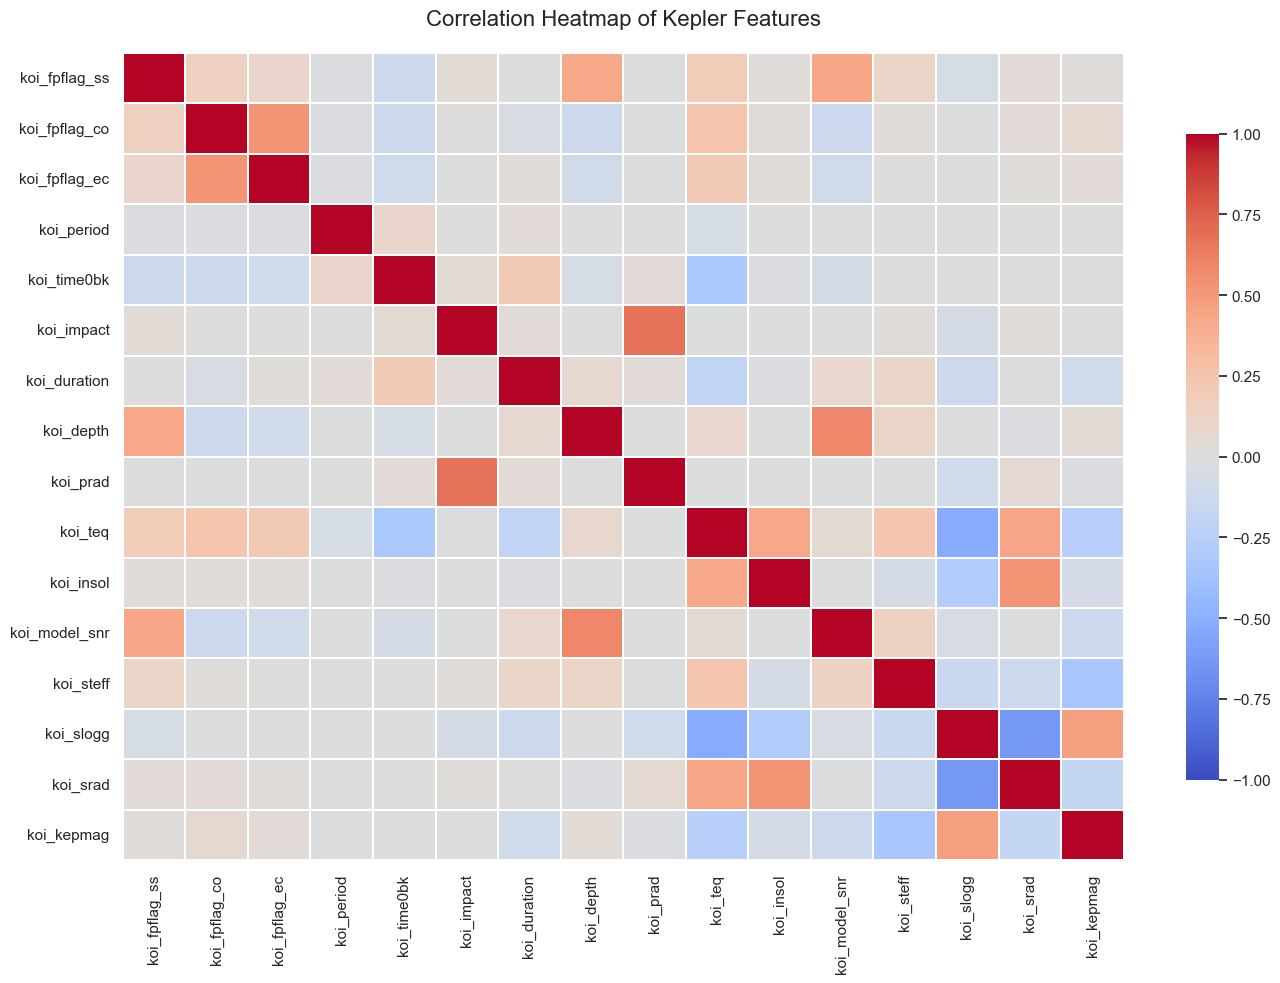

In [7]:
df = df.loc[:, ~df.columns.str.contains('err', case=False)]

numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr(method='pearson')

plt.figure(figsize=(14, 10))
sns.set(style="white")

heatmap = sns.heatmap(
    corr_matrix,
    cmap='coolwarm',       
    vmin=-1, vmax=1,       
    annot=False,            
    linewidths=0.3,          
    cbar_kws={"shrink": .8}  
)


plt.title('Correlation Heatmap of Kepler Features', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

In [ ]:
print("df.describe() for all KOI (Kepler Objects of Interest):")
display(df.describe().map("{:.3f}".format))

# Grouped df.describe() by planet disposition (confirmed, false positive, or candidate)
for disposition, group in df.groupby("koi_disposition", observed=True):
    print(f"\nSummary statistics for KOIs with disposition: {disposition}")
    display(group.describe().map("{:.3f}".format))

df.describe() for all KOI (Kepler Objects of Interest):


,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,...,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag
count,9564.000,9564.000,9564.000,9564.000,9110.000,9110.000,9564.000,9110.000,9110.000,9201.000,...,9201.000,9096.000,9081.000,9201.000,9096.000,9096.000,9201.000,9096.000,9096.000,9563.000
mean,0.232,0.195,0.120,75.671,0.002,-0.002,166.183,0.010,-0.010,0.735,...,5706.823,144.636,-162.265,4.310,0.121,-0.143,1.729,0.362,-0.395,14.265
std,0.422,0.396,0.325,1334.744,0.008,0.008,67.919,0.023,0.023,3.349,...,796.858,47.052,72.746,0.433,0.133,0.085,6.127,0.931,2.168,1.385
min,0.000,0.000,0.000,0.242,0.000,-0.172,120.516,0.000,-0.569,0.000,...,2661.000,0.000,-1762.000,0.047,0.000,-1.207,0.109,0.000,-116.137,6.966
25%,0.000,0.000,0.000,2.734,0.000,-0.000,132.762,0.001,-0.011,0.197,...,5310.000,106.000,-198.000,4.218,0.042,-0.196,0.829,0.129,-0.250,13.440
50%,0.000,0.000,0.000,9.753,0.000,-0.000,137.225,0.004,-0.004,0.537,...,5767.000,157.000,-160.000,4.438,0.070,-0.128,1.000,0.251,-0.111,14.520
75%,0.000,0.000,0.000,40.715,0.000,-0.000,170.695,0.011,-0.001,0.889,...,6112.000,174.000,-114.000,4.543,0.149,-0.088,1.345,0.364,-0.069,15.322
max,1.000,1.000,1.000,129995.778,0.172,0.000,1472.522,0.569,-0.000,100.806,...,15896.000,676.000,0.000,5.364,1.472,0.000,229.908,33.091,0.000,20.003



Summary statistics for KOIs with disposition: CANDIDATE


,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,...,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag
count,2248.000,2248.000,2248.000,2248.000,2171.000,2171.000,2248.000,2171.000,2171.000,2185.000,...,2185.000,2177.000,2177.000,2185.000,2177.000,2177.000,2185.000,2177.000,2177.000,2248.000
mean,0.014,0.000,0.000,130.524,0.002,-0.002,170.431,0.013,-0.013,0.537,...,5639.767,139.563,-153.668,4.331,0.115,-0.145,1.566,0.328,-0.322,14.338
std,0.118,0.000,0.000,2744.156,0.007,0.007,74.697,0.027,0.027,1.990,...,693.971,46.075,61.521,0.391,0.128,0.091,5.875,0.590,1.830,1.311
min,0.000,0.000,0.000,0.260,0.000,-0.142,129.730,0.000,-0.488,0.000,...,2661.000,0.000,-941.000,0.114,0.000,-1.207,0.109,0.000,-76.199,7.748
25%,0.000,0.000,0.000,5.108,0.000,-0.001,133.555,0.004,-0.014,0.147,...,5273.000,99.000,-192.000,4.248,0.042,-0.200,0.826,0.129,-0.217,13.570
50%,0.000,0.000,0.000,13.279,0.000,-0.000,138.475,0.008,-0.008,0.396,...,5729.000,154.000,-154.000,4.444,0.067,-0.125,0.990,0.244,-0.107,14.650
75%,0.000,0.000,0.000,59.304,0.001,-0.000,169.598,0.014,-0.004,0.770,...,6068.000,171.000,-102.000,4.544,0.141,-0.085,1.286,0.357,-0.068,15.367
max,1.000,0.000,0.000,129995.778,0.142,0.000,907.045,0.488,-0.000,64.516,...,10894.000,560.000,0.000,5.364,1.232,0.000,152.969,15.454,0.000,17.305



Summary statistics for KOIs with disposition: CONFIRMED


,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,...,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag
count,2293.000,2293.000,2293.000,2293.000,2292.000,2292.000,2293.000,2292.000,2292.000,2292.000,...,2292.000,2292.000,2279.000,2292.000,2292.000,2292.000,2292.000,2292.000,2292.000,2293.000
mean,0.011,0.003,0.000,27.063,0.000,-0.000,157.263,0.004,-0.004,0.427,...,5477.974,116.873,-124.185,4.411,0.090,-0.106,1.067,0.175,-0.150,14.337
std,0.106,0.051,0.021,54.019,0.001,0.001,42.479,0.010,0.010,0.332,...,677.133,43.070,52.078,0.235,0.079,0.065,0.643,0.143,0.225,1.227
min,0.000,0.000,0.000,0.342,0.000,-0.051,120.566,0.000,-0.345,0.000,...,2703.000,0.000,-712.000,2.410,0.000,-0.748,0.118,0.000,-4.943,8.224
25%,0.000,0.000,0.000,5.083,0.000,-0.000,134.206,0.001,-0.005,0.081,...,5171.000,82.000,-152.000,4.287,0.036,-0.126,0.808,0.066,-0.161,13.659
50%,0.000,0.000,0.000,11.323,0.000,-0.000,140.530,0.003,-0.003,0.393,...,5616.000,107.000,-112.000,4.455,0.064,-0.105,0.968,0.160,-0.089,14.590
75%,0.000,0.000,0.000,25.517,0.000,-0.000,171.304,0.005,-0.001,0.746,...,5929.500,153.000,-83.000,4.557,0.130,-0.052,1.200,0.243,-0.055,15.258
max,1.000,1.000,1.000,1071.233,0.051,-0.000,589.720,0.345,-0.000,1.300,...,9565.000,676.000,0.000,5.274,0.765,0.000,19.530,2.551,0.000,17.475



Summary statistics for KOIs with disposition: FALSE POSITIVE


,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,...,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag
count,5023.000,5023.000,5023.000,5023.000,4647.000,4647.000,5023.000,4647.000,4647.000,4724.000,...,4724.000,4627.000,4625.000,4724.000,4627.000,4627.000,4724.000,4627.000,4627.000,5022.000
mean,0.429,0.370,0.228,73.312,0.003,-0.003,168.354,0.011,-0.011,0.976,...,5848.873,160.775,-185.076,4.251,0.139,-0.161,2.125,0.471,-0.550,14.199
std,0.495,0.483,0.420,139.114,0.010,0.010,73.587,0.025,0.025,4.454,...,862.615,42.201,77.490,0.508,0.152,0.086,7.522,1.225,2.754,1.480
min,0.000,0.000,0.000,0.242,0.000,-0.172,120.516,0.000,-0.569,0.000,...,2661.000,0.000,-1762.000,0.047,0.000,-1.007,0.116,0.000,-116.137,6.966
25%,0.000,0.000,0.000,1.507,0.000,-0.000,132.204,0.000,-0.013,0.314,...,5398.000,151.500,-210.000,4.130,0.046,-0.204,0.845,0.194,-0.386,13.314
50%,0.000,0.000,0.000,6.383,0.000,-0.000,134.890,0.004,-0.004,0.656,...,5855.000,165.000,-179.000,4.433,0.074,-0.168,1.009,0.305,-0.123,14.408
75%,1.000,1.000,0.000,49.402,0.000,-0.000,170.193,0.013,-0.000,1.004,...,6225.000,181.000,-151.000,4.536,0.177,-0.105,1.548,0.431,-0.078,15.328
max,1.000,1.000,1.000,1064.268,0.172,-0.000,1472.522,0.569,-0.000,100.806,...,15896.000,595.000,0.000,5.283,1.472,0.000,229.908,33.091,0.000,20.003


In [6]:
# Information on the null values in the columns
df.isnull().sum()

koi_disposition        0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_period_err1      454
koi_period_err2      454
koi_time0bk            0
koi_time0bk_err1     454
koi_time0bk_err2     454
koi_impact           363
koi_impact_err1      454
koi_impact_err2      454
koi_duration           0
koi_duration_err1    454
koi_duration_err2    454
koi_depth            363
koi_depth_err1       454
koi_depth_err2       454
koi_prad             363
koi_prad_err1        363
koi_prad_err2        363
koi_teq              363
koi_insol            321
koi_insol_err1       321
koi_insol_err2       321
koi_model_snr        363
koi_steff            363
koi_steff_err1       468
koi_steff_err2       483
koi_slogg            363
koi_slogg_err1       468
koi_slogg_err2       468
koi_srad             363
koi_srad_err1        468
koi_srad_err2        468
koi_kepmag             1
dtype: int64

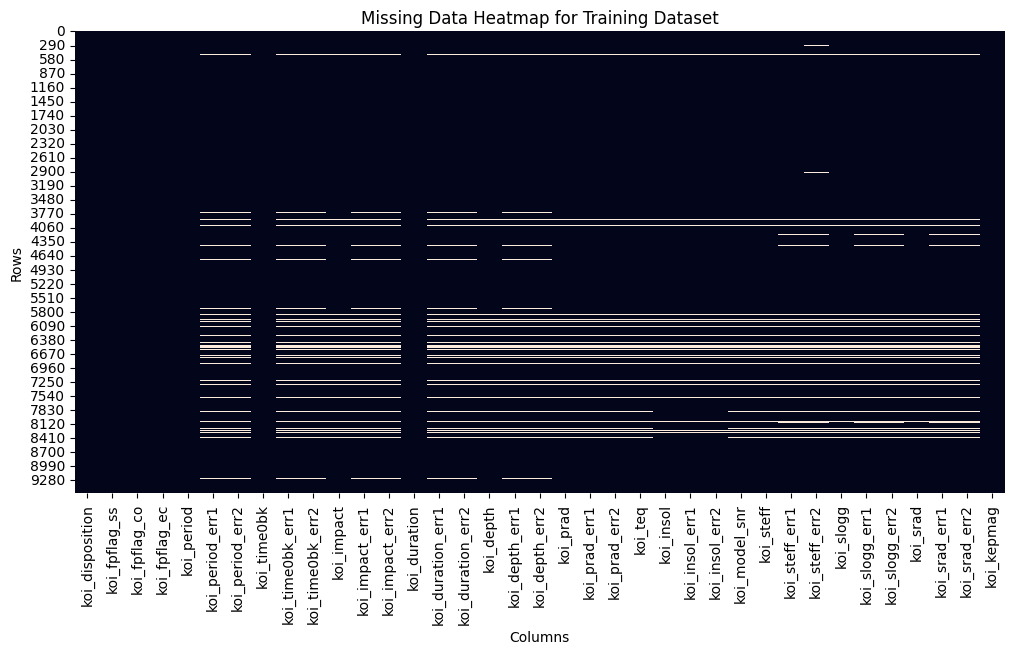

In [7]:
# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)

plt.title("Missing Data Heatmap for Keplar Training Dataset")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [8]:
# Take totals before data cleaning
before_total = len(df)
before = (
    df["koi_disposition"]
    .value_counts()
    .reindex(["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"], fill_value=0)
)

# Drop any row that has a null value
cleaned = df.dropna()

# Take totals after data cleaning
after_total = len(cleaned)
after = (
    cleaned["koi_disposition"]
    .value_counts()
    .reindex(["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"], fill_value=0)
)

# Summary dataframe to display
summary = pd.DataFrame({"Before": before, "After": after})
summary["Before_%"] = (summary["Before"] / before_total * 100).round(2)
summary["After_%"] = (summary["After"] / after_total * 100).round(2)

print(f"Rows before cleaning: {before_total}")
print(f"Rows after cleaning:  {after_total}")
display(summary)

Rows before cleaning: 9564
Rows after cleaning:  8992


,Before,After,Before_%,After_%
koi_disposition,,,,
CONFIRMED,2293,2279,23.98,25.34
FALSE POSITIVE,5023,4550,52.52,50.60
CANDIDATE,2248,2163,23.50,24.05
